In [2]:
from faker import Faker
import pandas as pd
import random

fake = Faker()

def generate_health_data(num_records):
    data = []
    for _ in range(num_records):
        record = {
            "patient_id": fake.uuid4(),
            "name": fake.name(),
            "gender": random.choice(["M", "F"]),
            "date_of_birth": fake.date_of_birth(minimum_age=2, maximum_age=90),
            "address": fake.address().replace("\n", ", "),
            "phone_number": fake.phone_number(),
            "email": fake.email(),
            "insurance_provider": random.choice(["Britam", "Jubilee", "Sanlam", "CIC Insurance Group"]),
            "diagnosis": random.choice(["Diabetes", "Hypertension", "Asthma", "Healthy"]),
            "visit_date": fake.date_between(start_date='-1y', end_date='today'),
            "prescription": random.choice(["Metformin", "Lisinopril", "Albuterol", "None"])
        }
        data.append(record)
    return pd.DataFrame(data)

# Generate 10 fake patient records
df = generate_health_data(100)
print(df)


                              patient_id              name gender  \
0   ee78dc71-561c-45d4-84c0-d154ae77bc15     Amber Simpson      F   
1   911e6841-790f-43b7-a8de-400646cec00f        Julie Rice      M   
2   a9dd6b58-2b3d-4473-ac01-6e18d28ad4dc       Carlos Lamb      M   
3   3926cb62-3224-4b64-84d9-e2f292fd613b    Daniel Jackson      M   
4   58f5a95a-03a1-4049-9da0-ae97618e4082  Melinda Anderson      M   
..                                   ...               ...    ...   
95  547b7e9f-52f6-416d-99d2-6febb1d50cfb       James White      M   
96  812218d2-a79d-44d1-bb96-1247c0901cd4   Jacqueline Webb      M   
97  a21eaa33-3d9f-4208-ab91-3518cc39c2ce    Michael Wagner      F   
98  9bb9155e-6d7b-4d60-9e85-38fbfba7ee84      Tracie Brown      F   
99  5e4e322d-d8ef-431e-9810-86a970888d1c   Melissa Vasquez      F   

   date_of_birth                                            address  \
0     1946-07-25         4990 Tracy Inlet, West Davidport, NC 02156   
1     1970-12-16        2950 

In [3]:
df.to_csv("fake_health_data.csv", index=False)


In [8]:
df.head()

,patient_id,name,gender,date_of_birth,address,phone_number,email,insurance_provider,diagnosis,visit_date,prescription
0,ee78dc71-561c-45d4-84c0-d154ae77bc15,Amber Simpson,F,1946-07-25,"4990 Tracy Inlet, West Davidport, NC 02156",(438)227-5383,belinda94@example.com,Sanlam,Asthma,2024-11-22,None
1,911e6841-790f-43b7-a8de-400646cec00f,Julie Rice,M,1970-12-16,"2950 John Center, Lake Danielfurt, NV 43258",001-779-391-6183,lawsonjoshua@example.org,Sanlam,Hypertension,2024-09-07,Lisinopril
2,a9dd6b58-2b3d-4473-ac01-6e18d28ad4dc,Carlos Lamb,M,1935-12-06,"81114 Andrew Orchard, Davidland, AR 04792",2953623526,fosterrobert@example.com,Britam,Diabetes,2024-12-26,Metformin
3,3926cb62-3224-4b64-84d9-e2f292fd613b,Daniel Jackson,M,1997-07-03,"61146 Dylan Plaza Suite 055, East Brooke, GU 4...",(551)387-1655x9871,cbarrera@example.net,CIC Insurance Group,Diabetes,2024-12-14,None
4,58f5a95a-03a1-4049-9da0-ae97618e4082,Melinda Anderson,M,1958-07-01,"2116 Tyler Street, Gillberg, AS 29819",598-290-5487,teresamoore@example.com,Sanlam,Hypertension,2024-08-03,Lisinopril


In [7]:
print(df.head())          # View first 5 rows
print(df.info())          # Check data types and non-null counts
print(df.describe(include='all'))  # Summary statistics


                             patient_id              name gender  \
0  ee78dc71-561c-45d4-84c0-d154ae77bc15     Amber Simpson      F   
1  911e6841-790f-43b7-a8de-400646cec00f        Julie Rice      M   
2  a9dd6b58-2b3d-4473-ac01-6e18d28ad4dc       Carlos Lamb      M   
3  3926cb62-3224-4b64-84d9-e2f292fd613b    Daniel Jackson      M   
4  58f5a95a-03a1-4049-9da0-ae97618e4082  Melinda Anderson      M   

  date_of_birth                                            address  \
0    1946-07-25         4990 Tracy Inlet, West Davidport, NC 02156   
1    1970-12-16        2950 John Center, Lake Danielfurt, NV 43258   
2    1935-12-06          81114 Andrew Orchard, Davidland, AR 04792   
3    1997-07-03  61146 Dylan Plaza Suite 055, East Brooke, GU 4...   
4    1958-07-01              2116 Tyler Street, Gillberg, AS 29819   

         phone_number                     email   insurance_provider  \
0       (438)227-5383     belinda94@example.com               Sanlam   
1    001-779-391-6183  law

In [6]:
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
df['visit_date'] = pd.to_datetime(df['visit_date'])


In [9]:
df.to_csv("synthetic_health_data.csv", index=False)
print("Data saved to synthetic_health_data.csv")


Data saved to synthetic_health_data.csv


In [10]:
import sqlite3
import pandas as pd

# Load CSV into DataFrame
df = pd.read_csv("synthetic_health_data.csv")

# Connect to (or create) SQLite database
conn = sqlite3.connect("healthcare.db")
cursor = conn.cursor()

# Create table schema matching your CSV columns
cursor.execute('''
CREATE TABLE IF NOT EXISTS patients (
    patient_id TEXT PRIMARY KEY,
    name TEXT,
    gender TEXT,
    date_of_birth DATE,
    address TEXT,
    phone_number TEXT,
    email TEXT,
    insurance_provider TEXT,
    diagnosis TEXT,
    visit_date DATE,
    prescription TEXT
)
''')

# Insert data into the table
df.to_sql('patients', conn, if_exists='replace', index=False)

conn.commit()
conn.close()
print("Data loaded into SQLite database successfully.")


Data loaded into SQLite database successfully.


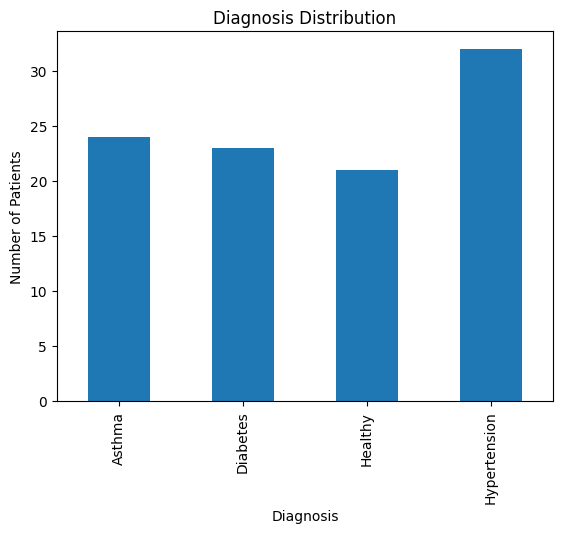

In [13]:
import matplotlib.pyplot as plt

# Load data from SQLite
conn = sqlite3.connect("healthcare.db")
df = pd.read_sql_query("SELECT diagnosis, COUNT(*) as count FROM patients GROUP BY diagnosis", conn)

# Plot diagnosis distribution
df.plot(kind='bar', x='diagnosis', y='count', legend=False)
plt.title("Diagnosis Distribution")
plt.xlabel("Diagnosis")
plt.ylabel("Number of Patients")
plt.show()
